Same as experiment 83 (i.e. fixed step size but adaptive $\epsilon$ schedule) except here we switch to THUG sooner. Notice before we used `pm_switch=0.05` whereas now we use `pm_switch=0.1`

In [9]:
import numpy as np
from numpy import zeros, eye, array, diag, exp, ones
from numpy.linalg import solve, norm
from numpy.random import choice, default_rng
from scipy.stats import multivariate_normal as MVN
from scipy.special import logsumexp
from scipy.stats import uniform as udist
import math
import time
from copy import deepcopy

import matplotlib.pyplot as plt
from matplotlib import rc
from ipywidgets.widgets import IntSlider
from ipywidgets.widgets import interact
from warnings import resetwarnings

from Manifolds.GeneralizedEllipseNew import GeneralizedEllipse
from markov_snippets import MSAdaptive, SMCAdaptive

In [10]:
def generate_settings(
    d=10, 
    N=5000,
    B=20,
    δ=0.1,
    δmin=1e-3,
    δmax=100.0,
    εmin=1e-16,
    min_pm=1e-4,
    maxiter=500,
    verbose=True,
    εs_fixed=None,
    adaptiveε=True,
    adaptiveδ=True,
    z0_manual=None,
    pm_target=0.23,
    pm_switch=0.1,
    prior_seed=1234,
    low_memory=True,
    integrator='rwm',
    εprop_switch=0.01,
    ε0_manual=None,
    quantile_value=0.9,
    initialization='prior',
    switch_strategy='pm',
    prior='uniform',
    kernel='uniform',
    prior_scale=7,
    thinning=10,
    burnin=100):
    # Generate the manifold
    μ = zeros(d)
    Σ = diag(np.r_[0.1, ones(d-1)])  
    level_set_value = -23
    manifold = GeneralizedEllipse(μ, Σ, exp(level_set_value), prior=prior, kernel=kernel, prior_scale=prior_scale)
    # grab arguments
    arguments = locals()
    return arguments

In [11]:
# delta = 1.0
SETTINGS_RWM_1           = generate_settings(integrator='rwm', adaptiveδ=False, δ=1.0)
SETTINGS_THUG_1          = generate_settings(integrator='thug', adaptiveδ=False, δ=1.0)
SETTINGS_RWM_THEN_THUG_1 = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=1.0)

# delta = 0.05
SETTINGS_RWM_005           = generate_settings(integrator='rwm', adaptiveδ=False, δ=0.05)
SETTINGS_THUG_005          = generate_settings(integrator='thug', adaptiveδ=False, δ=0.05)
SETTINGS_RWM_THEN_THUG_005 = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=0.05)

# delta = 0.001
SETTINGS_RWM_0001           = generate_settings(integrator='rwm', adaptiveδ=False, δ=0.001)
SETTINGS_THUG_0001          = generate_settings(integrator='thug', adaptiveδ=False, δ=0.001)
SETTINGS_RWM_THEN_THUG_0001 = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=0.001)

# Switching

## $\delta=1.0$

#### SMC

In [13]:
SMC_RT_1 = SMCAdaptive(SETTINGS_RWM_THEN_THUG_1)
_ = SMC_RT_1.sample()

Stochastic Kernel: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Particles resampled.
	Epsilon: 258.4945850518209909
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0416000000000000
	Step-size kept fixed at: 1.0000000000000000


####################################
### SWITCHING TO THUG KERNEL ###
####################################


Iteration:  2
	Particles resampled.
	Epsilon: 218.7153288726690334
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.2802000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Particles resampled.
	Epsilon: 183.6155912838585493
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.2910000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Particles resampled.
	Epsilon: 154.7799998772719050
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.3172000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	Par

	Mutation step done.
	Approx AP: 0.8068000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  42
	Particles resampled.
	Epsilon: 25.7157940935494445
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8132000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  43
	Particles resampled.
	Epsilon: 24.9063662666292025
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8044000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  44
	Particles resampled.
	Epsilon: 24.1159566921921211
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8136000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  45
	Particles resampled.
	Epsilon: 23.4446473554362882
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8026000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  46
	Particles resampled.
	Epsilon: 22.6638165971398067
	Weights computed and normalised.
	Mutation 

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.6936000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  84
	Particles resampled.
	Epsilon: 3.0473785951155850
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.6752000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  85
	Particles resampled.
	Epsilon: 2.7967820375684198
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.6540000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  86
	Particles resampled.
	Epsilon: 2.5417556035506723
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.6534000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  87
	Particles resampled.
	Epsilon: 2.2951966148807159
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.6426000000000001
	Step-size kept fixed at: 1.0000000000000000
Iteration:  88
	Particles resampled.
	Epsilon: 2.0516811543478668
	Weights comput

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0652000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  126
	Particles resampled.
	Epsilon: 0.0315753420906191
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0534000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  127
	Particles resampled.
	Epsilon: 0.0285583801945407
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0522000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  128
	Particles resampled.
	Epsilon: 0.0257083537574996
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0448000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  129
	Particles resampled.
	Epsilon: 0.0230399025814201
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0438000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  130
	Particles resampled.
	Epsilon: 0.0204557178906992
	Weights c

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0012000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  168
	Particles resampled.
	Epsilon: 0.0002485701955734
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0010000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  169
	Particles resampled.
	Epsilon: 0.0002283002514730
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0006000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  170
	Particles resampled.
	Epsilon: 0.0002165552626330
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0004000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  171
	Particles resampled.
	Epsilon: 0.0001791913863485
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0002000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  172
	Particles resampled.
	Epsilon: 0.0001315291111887
	Weights c

#### Markov Snippets

In [14]:
MS_RT_1 = MSAdaptive(SETTINGS_RWM_THEN_THUG_1)
_ = MS_RT_1.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.2843954776984674
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5460000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  2
	Trajectories constructed.
	Epsilon: 213.7916804761001401
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5644000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Trajectories constructed.
	Epsilon: 179.5852539235991117
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5840000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Trajectories constructed.
	Epsilon: 149.4856857096951330
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5798000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	T

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3624000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  38
	Trajectories constructed.
	Epsilon: 9.0290553919097221
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3524000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  39
	Trajectories constructed.
	Epsilon: 8.1896388513972411
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3502000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  40
	Trajectories constructed.
	Epsilon: 7.4230999482812505
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3460000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  41
	Trajectories constructed.
	Epsilon: 6.6807766576273462
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 

	Trajectories constructed.
	Epsilon: 0.1804089695525889
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8210000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  74
	Trajectories constructed.
	Epsilon: 0.1597685805342330
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8144000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  75
	Trajectories constructed.
	Epsilon: 0.1407429420743789
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8129999999999999
	Step-size kept fixed at: 1.0000000000000000
Iteration:  76
	Trajectories constructed.
	Epsilon: 0.1241470479660123
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7846000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  77
	Trajectories constructed.
	Epsilon: 0.1095489756573532
	Weights computed and normalized.
	P

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2338000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  110
	Trajectories constructed.
	Epsilon: 0.0024861953383059
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2424000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  111
	Trajectories constructed.
	Epsilon: 0.0022148037394807
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2172000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  112
	Trajectories constructed.
	Epsilon: 0.0019672158615762
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2000000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  113
	Trajectories constructed.
	Epsilon: 0.0017672462593069
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0234000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  146
	Trajectories constructed.
	Epsilon: 0.0000430627678853
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0100000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  147
	Trajectories constructed.
	Epsilon: 0.0000384819824866
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0248000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  148
	Trajectories constructed.
	Epsilon: 0.0000335560173106
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0192000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  149
	Trajectories constructed.
	Epsilon: 0.0000302660725943
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0022000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  182
	Trajectories constructed.
	Epsilon: 0.0000009677716829
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0036000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  183
	Trajectories constructed.
	Epsilon: 0.0000008412301142
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0008000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  184
	Trajectories constructed.
	Epsilon: 0.0000006940008667
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0010000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  185
	Trajectories constructed.
	Epsilon: 0.0000006457876907
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

In [21]:
# Colors
SMC_RWM_COLOR = 'orange'     # warm, light
SMC_RT_COLOR = 'lightcoral'  # warm, light
MS_RWM_COLOR = 'thistle'   # cold, light
MS_RT_COLOR = 'lightskyblue' # cold, light
SMC_RT_LINE_COLOR = 'firebrick'  # warm, dark
MS_RT_LINE_COLOR = 'royalblue'   # cold, dark

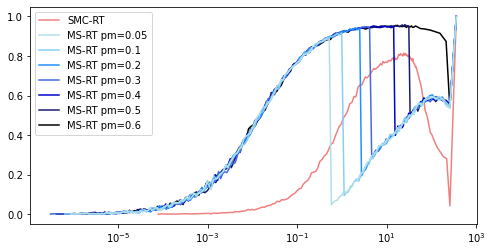

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(SMC_RT_1.εs, SMC_RT_1.APS, label='SMC-RT', color=SMC_RT_COLOR)
ax.plot(MS_RT_1_old.εs, MS_RT_1_old.PROP_MOVED, label='MS-RT pm=0.05', color='powderblue', zorder=7)
ax.plot(MS_RT_1.εs, MS_RT_1.PROP_MOVED, label='MS-RT pm=0.1', color=MS_RT_COLOR, zorder=6)
# ax.axvline(x=SMC_RT_1.εs[SMC_RT_1.n_switch], color=SMC_RT_LINE_COLOR, linestyle='--')
# ax.axvline(x=MS_RT_1.εs[MS_RT_1.n_switch], color=MS_RT_LINE_COLOR, linestyle='--')
# ax.plot(SMC_RT_1_new.εs, SMC_RT_1_new.APS, label='SMC-RT', color=SMC_RT_COLOR)
ax.plot(MS_RT_1_new.εs, MS_RT_1_new.PROP_MOVED, label='MS-RT pm=0.2', color='dodgerblue', zorder=5)
ax.plot(MS_RT_1_new_new.εs, MS_RT_1_new_new.PROP_MOVED, label='MS-RT pm=0.3', color='royalblue', zorder=4)
ax.plot(MS_RT_1_new_new_new.εs, MS_RT_1_new_new_new.PROP_MOVED, label='MS-RT pm=0.4', color='mediumblue', zorder=3)
ax.plot(MS_RT_1_new_new_new_new.εs, MS_RT_1_new_new_new_new.PROP_MOVED, label='MS-RT pm=0.5', color='midnightblue', zorder=2)
ax.plot(MS_RT_1_06.εs, MS_RT_1_06.PROP_MOVED, label='MS-RT pm=0.6', color='black', zorder=1)
# ax.axvline(x=SMC_RT_1_new.εs[SMC_RT_1_new.n_switch], color='red', linestyle='--')
# ax.axvline(x=MS_RT_1_new.εs[MS_RT_1_new.n_switch], color='blue', linestyle='--')
ax.set_xscale('log')
ax.legend()
plt.show()

### Try with even larger pm_switch

In [25]:
# delta = 1.0
SETTINGS_RT_1_new = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=1.0, pm_switch=0.2)

In [26]:
SMC_RT_1_new = SMCAdaptive(SETTINGS_RT_1_new)
_ = SMC_RT_1_new.sample()

Stochastic Kernel: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Particles resampled.
	Epsilon: 257.1534623954585186
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0486000000000000
	Step-size kept fixed at: 1.0000000000000000


####################################
### SWITCHING TO THUG KERNEL ###
####################################


Iteration:  2
	Particles resampled.
	Epsilon: 218.5649190995446531
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.2826000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Particles resampled.
	Epsilon: 179.5008445492919122
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.2932000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Particles resampled.
	Epsilon: 151.8516359143490604
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.3122000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	Par

	Mutation step done.
	Approx AP: 0.8251999999999999
	Step-size kept fixed at: 1.0000000000000000
Iteration:  42
	Particles resampled.
	Epsilon: 21.2821353062512344
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8164000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  43
	Particles resampled.
	Epsilon: 20.3995879805389535
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8172000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  44
	Particles resampled.
	Epsilon: 19.6483847268787812
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8218000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  45
	Particles resampled.
	Epsilon: 18.9160418804630801
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.8198000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  46
	Particles resampled.
	Epsilon: 18.1622176416666719
	Weights computed and normalised.
	Mutation 

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.4986000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  84
	Particles resampled.
	Epsilon: 1.0089983079794280
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.4640000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  85
	Particles resampled.
	Epsilon: 0.8893001887012858
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.4402000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  86
	Particles resampled.
	Epsilon: 0.7979718094714556
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.4296000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  87
	Particles resampled.
	Epsilon: 0.7164238940562739
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.3910000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  88
	Particles resampled.
	Epsilon: 0.6386687069939555
	Weights comput

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0256000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  126
	Particles resampled.
	Epsilon: 0.0098875724181973
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0254000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  127
	Particles resampled.
	Epsilon: 0.0088113930401356
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0206000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  128
	Particles resampled.
	Epsilon: 0.0078844827264980
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0198000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  129
	Particles resampled.
	Epsilon: 0.0071654281222138
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0164000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  130
	Particles resampled.
	Epsilon: 0.0064489162195365
	Weights c

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0002000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  168
	Particles resampled.
	Epsilon: 0.0001154888766933
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0004000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  169
	Particles resampled.
	Epsilon: 0.0001064587314907
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0004000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  170
	Particles resampled.
	Epsilon: 0.0000942713992941
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0000000000000000
	Step-size kept fixed at: 1.0000000000000000


In [27]:
MS_RT_1_new = MSAdaptive(SETTINGS_RT_1_new)
_ = MS_RT_1_new.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.2843954776984674
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5482000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  2
	Trajectories constructed.
	Epsilon: 210.8547321639559868
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5612000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Trajectories constructed.
	Epsilon: 175.4687677129139729
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5926000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Trajectories constructed.
	Epsilon: 145.9982812439670852
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5828000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	T

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3554000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  38
	Trajectories constructed.
	Epsilon: 8.8939440174748281
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3592000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  39
	Trajectories constructed.
	Epsilon: 8.0551551854070631
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3558000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  40
	Trajectories constructed.
	Epsilon: 7.2946933231280076
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3390000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  41
	Trajectories constructed.
	Epsilon: 6.5312219655932218
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 

	Trajectories constructed.
	Epsilon: 0.1449753934207223
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8198000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  74
	Trajectories constructed.
	Epsilon: 0.1289980955971856
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7992000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  75
	Trajectories constructed.
	Epsilon: 0.1137681842974217
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7936000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  76
	Trajectories constructed.
	Epsilon: 0.1017644028241417
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7696000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  77
	Trajectories constructed.
	Epsilon: 0.0914924953713786
	Weights computed and normalized.
	P

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2496000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  110
	Trajectories constructed.
	Epsilon: 0.0022921159503397
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2226000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  111
	Trajectories constructed.
	Epsilon: 0.0020459413656631
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2034000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  112
	Trajectories constructed.
	Epsilon: 0.0018259205198433
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1892000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  113
	Trajectories constructed.
	Epsilon: 0.0016288242786846
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0166000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  146
	Trajectories constructed.
	Epsilon: 0.0000379326576237
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0200000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  147
	Trajectories constructed.
	Epsilon: 0.0000333762649817
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0188000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  148
	Trajectories constructed.
	Epsilon: 0.0000296694199598
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0068000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  149
	Trajectories constructed.
	Epsilon: 0.0000259644350798
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

### Try even larger

In [32]:
SETTINGS_RT_1_new_new = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=1.0, pm_switch=0.3)

In [33]:
MS_RT_1_new_new = MSAdaptive(SETTINGS_RT_1_new_new)
_ = MS_RT_1_new_new.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.2843954776984674
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5438000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  2
	Trajectories constructed.
	Epsilon: 212.5905742599638586
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5676000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Trajectories constructed.
	Epsilon: 178.3537592264850673
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5724000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Trajectories constructed.
	Epsilon: 151.8076432487252418
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5898000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	T

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3802000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  38
	Trajectories constructed.
	Epsilon: 8.8114864489281146
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3506000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  39
	Trajectories constructed.
	Epsilon: 7.9649966031818806
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3528000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  40
	Trajectories constructed.
	Epsilon: 7.1777041025024637
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3312000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  41
	Trajectories constructed.
	Epsilon: 6.4102562639083391
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 

	Trajectories constructed.
	Epsilon: 0.1262117535561842
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7984000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  74
	Trajectories constructed.
	Epsilon: 0.1119905074113554
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7818000000000001
	Step-size kept fixed at: 1.0000000000000000
Iteration:  75
	Trajectories constructed.
	Epsilon: 0.1002637069280461
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7684000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  76
	Trajectories constructed.
	Epsilon: 0.0892532115444880
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7562000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  77
	Trajectories constructed.
	Epsilon: 0.0792533130596436
	Weights computed and normalized.
	P

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2052000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  110
	Trajectories constructed.
	Epsilon: 0.0019541958683291
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1790000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  111
	Trajectories constructed.
	Epsilon: 0.0017599004087259
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2152000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  112
	Trajectories constructed.
	Epsilon: 0.0015601445601916
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1768000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  113
	Trajectories constructed.
	Epsilon: 0.0013911452323626
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0244000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  146
	Trajectories constructed.
	Epsilon: 0.0000354654551643
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0140000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  147
	Trajectories constructed.
	Epsilon: 0.0000319608905741
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0202000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  148
	Trajectories constructed.
	Epsilon: 0.0000282661536524
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0086000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  149
	Trajectories constructed.
	Epsilon: 0.0000259150508064
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0010000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  182
	Trajectories constructed.
	Epsilon: 0.0000004742754641
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0006000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  183
	Trajectories constructed.
	Epsilon: 0.0000003912185917
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0016000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  184
	Trajectories constructed.
	Epsilon: 0.0000003291539073
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0012000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  185
	Trajectories constructed.
	Epsilon: 0.0000003094499803
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

### Try even largerrr

In [43]:
SETTINGS_RT_1_new_new_new = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=1.0, pm_switch=0.4)

In [39]:
MS_RT_1_new_new_new = MSAdaptive(SETTINGS_RT_1_new_new_new)
_ = MS_RT_1_new_new_new.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.2843954776984674
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5562000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  2
	Trajectories constructed.
	Epsilon: 215.4568279471426706
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5722000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Trajectories constructed.
	Epsilon: 180.4721011593359776
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5786000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Trajectories constructed.
	Epsilon: 150.7247729695131966
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5806000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	T

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9466000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  37
	Trajectories constructed.
	Epsilon: 9.4999484249677355
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9490000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  38
	Trajectories constructed.
	Epsilon: 8.6935464621282641
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9492000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  39
	Trajectories constructed.
	Epsilon: 7.9061003036537718
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9508000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  40
	Trajectories constructed.
	Epsilon: 7.2017264053800618
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 

	Trajectories constructed.
	Epsilon: 0.1209786937809554
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7930000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  74
	Trajectories constructed.
	Epsilon: 0.1068845214001030
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7688000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  75
	Trajectories constructed.
	Epsilon: 0.0953811193152248
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7630000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  76
	Trajectories constructed.
	Epsilon: 0.0851063220452446
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7566000000000001
	Step-size kept fixed at: 1.0000000000000000
Iteration:  77
	Trajectories constructed.
	Epsilon: 0.0758552865429809
	Weights computed and normalized.
	P

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2118000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  110
	Trajectories constructed.
	Epsilon: 0.0018533097653808
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2040000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  111
	Trajectories constructed.
	Epsilon: 0.0016657284331565
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1702000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  112
	Trajectories constructed.
	Epsilon: 0.0014749258094341
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1976000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  113
	Trajectories constructed.
	Epsilon: 0.0013144657751262
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0136000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  146
	Trajectories constructed.
	Epsilon: 0.0000393016863942
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0170000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  147
	Trajectories constructed.
	Epsilon: 0.0000347076433513
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0196000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  148
	Trajectories constructed.
	Epsilon: 0.0000305839024119
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0214000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  149
	Trajectories constructed.
	Epsilon: 0.0000267189840251
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

### even largerrr

In [46]:
SETTINGS_RT_1_new_new_new_new = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=1.0, pm_switch=0.5)

In [47]:
MS_RT_1_new_new_new_new = MSAdaptive(SETTINGS_RT_1_new_new_new_new)
_ = MS_RT_1_new_new_new_new.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.2843954776984674
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5506000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  2
	Trajectories constructed.
	Epsilon: 212.5679949884594180
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5762000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Trajectories constructed.
	Epsilon: 179.3439763323625584
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5742000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Trajectories constructed.
	Epsilon: 150.5701226888661211
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5920000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	T

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9460000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  37
	Trajectories constructed.
	Epsilon: 10.6787434138906647
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9500000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  38
	Trajectories constructed.
	Epsilon: 9.8472515895093125
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9500000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  39
	Trajectories constructed.
	Epsilon: 9.0657439831336362
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9506000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  40
	Trajectories constructed.
	Epsilon: 8.2994892365234172
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved:

	Trajectories constructed.
	Epsilon: 0.1498024343433464
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8106000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  74
	Trajectories constructed.
	Epsilon: 0.1319932303206564
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7994000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  75
	Trajectories constructed.
	Epsilon: 0.1175188471651040
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7877999999999999
	Step-size kept fixed at: 1.0000000000000000
Iteration:  76
	Trajectories constructed.
	Epsilon: 0.1058613605017008
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7808000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  77
	Trajectories constructed.
	Epsilon: 0.0947166343785987
	Weights computed and normalized.
	P

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2290000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  110
	Trajectories constructed.
	Epsilon: 0.0021795507509417
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2250000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  111
	Trajectories constructed.
	Epsilon: 0.0019316271754576
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2078000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  112
	Trajectories constructed.
	Epsilon: 0.0016991481872811
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1946000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  113
	Trajectories constructed.
	Epsilon: 0.0015297582152414
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0240000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  146
	Trajectories constructed.
	Epsilon: 0.0000359626705372
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0184000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  147
	Trajectories constructed.
	Epsilon: 0.0000318617863641
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0260000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  148
	Trajectories constructed.
	Epsilon: 0.0000290311597922
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0226000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  149
	Trajectories constructed.
	Epsilon: 0.0000260466998053
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0006000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  182
	Trajectories constructed.
	Epsilon: 0.0000005414135671
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0008000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  183
	Trajectories constructed.
	Epsilon: 0.0000004506892878
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0010000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  184
	Trajectories constructed.
	Epsilon: 0.0000004182922247
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0000000000000000
	Step-size kept fixed at: 1.0000000000000000


### with 0.6

In [52]:
SETTINGS_RT_1_06 = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=1.0, pm_switch=0.6)

In [53]:
MS_RT_1_06 = MSAdaptive(SETTINGS_RT_1_06)
_ = MS_RT_1_06.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.2843954776984674
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5407999999999999
	Step-size kept fixed at: 1.0000000000000000


####################################
### SWITCHING TO THUG INTEGRATOR ###
####################################


Iteration:  2
	Trajectories constructed.
	Epsilon: 212.4244818686197789
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8736000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Trajectories constructed.
	Epsilon: 154.5958176583429236
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9150000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Trajectories constructed.
	Epsilon: 94.5533543999570014
	Weights computed and normalized.
	Particles Resampled.
	V

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9500000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  37
	Trajectories constructed.
	Epsilon: 7.2104417204265774
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9506000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  38
	Trajectories constructed.
	Epsilon: 6.5808505095629339
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9452000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  39
	Trajectories constructed.
	Epsilon: 5.9720225987934814
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9446000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  40
	Trajectories constructed.
	Epsilon: 5.3657398153882818
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 

	Trajectories constructed.
	Epsilon: 0.0899100599934282
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7578000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  74
	Trajectories constructed.
	Epsilon: 0.0805007953811320
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7556000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  75
	Trajectories constructed.
	Epsilon: 0.0712949756727248
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7232000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  76
	Trajectories constructed.
	Epsilon: 0.0632962538993631
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7126000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  77
	Trajectories constructed.
	Epsilon: 0.0562397842219603
	Weights computed and normalized.
	P

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1710000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  110
	Trajectories constructed.
	Epsilon: 0.0012094793042607
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1546000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  111
	Trajectories constructed.
	Epsilon: 0.0010964372429893
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1604000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  112
	Trajectories constructed.
	Epsilon: 0.0009725923327188
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1458000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  113
	Trajectories constructed.
	Epsilon: 0.0008756074806232
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0164000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  146
	Trajectories constructed.
	Epsilon: 0.0000231578703875
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0176000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  147
	Trajectories constructed.
	Epsilon: 0.0000211408357124
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0090000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  148
	Trajectories constructed.
	Epsilon: 0.0000193044195406
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0108000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  149
	Trajectories constructed.
	Epsilon: 0.0000179689378669
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

### try very small

In [48]:
SETTINGS_RT_1_old = generate_settings(integrator='rwm_then_thug', adaptiveδ=False, δ=1.0, pm_switch=0.05)

In [49]:
MS_RT_1_old = MSAdaptive(SETTINGS_RT_1_old)
_ = MS_RT_1_old.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375830774487
Iteration:  1
	Trajectories constructed.
	Epsilon: 257.2843954776984674
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5352000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  2
	Trajectories constructed.
	Epsilon: 210.9525032199069869
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5486000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  3
	Trajectories constructed.
	Epsilon: 173.3984382928760510
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5842000000000001
	Step-size kept fixed at: 1.0000000000000000
Iteration:  4
	Trajectories constructed.
	Epsilon: 145.2812387348177481
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5958000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  5
	T

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3746000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  38
	Trajectories constructed.
	Epsilon: 8.9948935781623405
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3586000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  39
	Trajectories constructed.
	Epsilon: 8.0534171291312706
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3528000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  40
	Trajectories constructed.
	Epsilon: 7.2263139771455762
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3486000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  41
	Trajectories constructed.
	Epsilon: 6.5291687303315520
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 

	Trajectories constructed.
	Epsilon: 0.1754100680908159
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8124000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  74
	Trajectories constructed.
	Epsilon: 0.1575759700199086
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8092000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  75
	Trajectories constructed.
	Epsilon: 0.1397475020017623
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8034000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  76
	Trajectories constructed.
	Epsilon: 0.1234748982700417
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7936000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  77
	Trajectories constructed.
	Epsilon: 0.1094724731865462
	Weights computed and normalized.
	P

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2376000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  110
	Trajectories constructed.
	Epsilon: 0.0025647557332249
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2490000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  111
	Trajectories constructed.
	Epsilon: 0.0022767976747872
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2174000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  112
	Trajectories constructed.
	Epsilon: 0.0020349030447619
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2092000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  113
	Trajectories constructed.
	Epsilon: 0.0018454720798459
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0318000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  146
	Trajectories constructed.
	Epsilon: 0.0000456814837612
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0170000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  147
	Trajectories constructed.
	Epsilon: 0.0000404811924334
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0168000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  148
	Trajectories constructed.
	Epsilon: 0.0000357942928588
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0112000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  149
	Trajectories constructed.
	Epsilon: 0.0000317872576815
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Mov

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0006000000000000
	Step-size kept fixed at: 1.0000000000000000
Iteration:  182
	Trajectories constructed.
	Epsilon: 0.0000008820027645
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0000000000000000
	Step-size kept fixed at: 1.0000000000000000


### Only THUG (corresponding to pm_switch=1.0)

In [58]:
SETTINGS_THUG = generate_settings(integrator='thug', adaptiveδ=False, δ=1.0)

In [59]:
MS_THUG = MSAdaptive(SETTINGS_THUG)
_ = MS_THUG.sample()

Integrator: THUG.


NameError: name 'THUGsampler' is not defined